## 异常检测XGBoost
## UN USED

In [714]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from matplotlib.font_manager import FontProperties
import shap

shap.initjs()


In [715]:
#配色
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)
bluegreyse = (76/255, 114/255, 176/255,1)

font = FontProperties(family='Arial', size=12)

In [716]:
# 指定文件路径
file_path_test = "../SOH1/EIS_state_V/EIS_V_45C02-Copy2_yichang.txt"
# file_path = "../SOH1/EISSTATEI/EIS_I_HEBING.txt"

# file_path = "../SOH1/EISstateIX/EIS_IX_HEBING.txt"
# 读取文本文件，使用多个制表符作为分隔符
data_test = pd.read_csv(file_path_test, sep='\t', header=None, names=["Z_" + str(i) for i in range(120)])

# 显示前几行数据

data_test = data_test.loc[0:].copy()
data_test

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_110,Z_111,Z_112,Z_113,Z_114,Z_115,Z_116,Z_117,Z_118,Z_119
0,0.55040,0.55430,0.56038,0.56594,0.56869,0.57757,0.58185,0.58864,0.59444,0.60204,...,0.08052,0.09204,0.10809,0.12735,0.14638,0.16716,0.18935,0.21703,0.25181,-0.03744
1,0.58207,0.58704,0.59074,0.59544,0.60200,0.60855,0.61335,0.62126,0.62855,0.63451,...,0.08465,0.09560,0.10906,0.12649,0.14708,0.16686,0.18915,0.21990,0.25962,-0.03610
2,0.56113,0.56696,0.57270,0.57752,0.58250,0.58877,0.59745,0.60053,0.60849,0.61573,...,0.08255,0.09639,0.11376,0.13221,0.14853,0.16869,0.19444,0.22218,0.25206,-0.03758
3,0.55954,0.56473,0.56961,0.57382,0.58090,0.58582,0.59286,0.59866,0.60644,0.61326,...,0.08506,0.09916,0.11415,0.13038,0.14677,0.16981,0.19553,0.22077,0.25089,-0.03622
4,0.54878,0.55271,0.55923,0.56431,0.56967,0.57641,0.58098,0.58961,0.59696,0.60270,...,0.08404,0.09850,0.11515,0.13267,0.14838,0.16944,0.19609,0.22424,0.24936,-0.03459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.37706,0.38562,0.39357,0.40224,0.41037,0.41679,0.42318,0.43253,0.43888,0.44742,...,0.10173,0.11657,0.13491,0.15962,0.19166,0.22601,0.25500,0.28455,0.31862,-0.01155
305,0.37779,0.38679,0.39343,0.40311,0.40990,0.41774,0.42518,0.43287,0.44012,0.44734,...,0.10225,0.12244,0.14462,0.16723,0.18730,0.21474,0.24555,0.27476,0.30644,-0.01062
306,0.37796,0.38568,0.39259,0.40104,0.41050,0.41697,0.42654,0.43222,0.43864,0.44691,...,0.10310,0.12321,0.14435,0.16571,0.18709,0.21492,0.24563,0.27498,0.30743,-0.01054
307,0.37740,0.38399,0.39485,0.40211,0.40978,0.41650,0.42370,0.43107,0.43843,0.44724,...,0.10333,0.12365,0.14414,0.16640,0.18701,0.21457,0.24491,0.27413,0.30817,-0.01049


In [717]:
# 指定文件路径
file_path = "../SOH1/EIS_state_V/EIS_V.txt"
# file_path = "../SOH1/EISSTATEI/EIS_I_HEBING.txt"

# file_path = "../SOH1/EISstateIX/EIS_IX_HEBING.txt"
# 读取文本文件，使用多个制表符作为分隔符
data = pd.read_csv(file_path, sep='\t', header=None, names=["Z_" + str(i) for i in range(120)])

# 显示前几行数据
data.head()

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_110,Z_111,Z_112,Z_113,Z_114,Z_115,Z_116,Z_117,Z_118,Z_119
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562


In [718]:
data

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_110,Z_111,Z_112,Z_113,Z_114,Z_115,Z_116,Z_117,Z_118,Z_119
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,0.37706,0.38562,0.39357,0.40224,0.41037,0.41679,0.42318,0.43253,0.43888,0.44742,...,0.10173,0.11657,0.13491,0.15962,0.19166,0.22601,0.25500,0.28455,0.31862,-0.01155
2297,0.37779,0.38679,0.39343,0.40311,0.40990,0.41774,0.42518,0.43287,0.44012,0.44734,...,0.10225,0.12244,0.14462,0.16723,0.18730,0.21474,0.24555,0.27476,0.30644,-0.01062
2298,0.37796,0.38568,0.39259,0.40104,0.41050,0.41697,0.42654,0.43222,0.43864,0.44691,...,0.10310,0.12321,0.14435,0.16571,0.18709,0.21492,0.24563,0.27498,0.30743,-0.01054
2299,0.37740,0.38399,0.39485,0.40211,0.40978,0.41650,0.42370,0.43107,0.43843,0.44724,...,0.10333,0.12365,0.14414,0.16640,0.18701,0.21457,0.24491,0.27413,0.30817,-0.01049


In [719]:
np.shape(data)

(2301, 120)

In [720]:
# 指定 y 文件的路径
# y_file_path = "../SOH1/合集数据/SOH_all_40_temp.txt"
# y_file_path = "../SOH1/SOH_all_1.txt"
y_file_path = "../SOH1/合集数据/NEWSOH_all_40.txt"
# 读取 y 文件
with open(y_file_path, "r") as file:
    # 逐行读取 y 值，将其转换为浮点数并存储在一个列表中
    y_values = [float(line.strip()) for line in file]

# 将 y 值存储在 Pandas Series 中
y_series = pd.Series(y_values, name="SOH")

# 显示前几个 y 值
np.shape(y_series)

(2301,)

In [721]:
# import pandas as pd

# # 确保索引是从0开始的，这样第2105行实际上在索引2104处
# selected_value = y_series.iloc[2104]

# # 创建一个新的 Pandas Series，包含80个重复的选定值
# y_series_test = pd.Series([selected_value] * 80, name="SOH")


In [722]:
y_series_test

0     89.067865
1     89.067865
2     89.067865
3     89.067865
4     89.067865
        ...    
75    89.067865
76    89.067865
77    89.067865
78    89.067865
79    89.067865
Name: SOH, Length: 80, dtype: float64

In [723]:
# C0 = data
# #25
# C1 = data.loc[0:189].copy()
# C2 = data.loc[190:369].copy()
# C3 = data.loc[370:570].copy()
# C4 = data.loc[571:604].copy() ##坏的,不可单独使用
# C5 = data.loc[605:797].copy()  ##24678d坏
# C6 = data.loc[798:953].copy()
# C7 = data.loc[954:1046].copy()
# C8 = data.loc[1047:1082].copy() ##坏的
# #35
# C9 = data.loc[1083:1376].copy()
# C10 = data.loc[1377:1693].copy()
# #45
# C11 = data.loc[1624:1991].copy()
# C12 = data.loc[1992:2300].copy()

# C13 = data.loc[0:2300].copy() #C1-C5
# C14 = data.loc[910:1121].copy()  #C6C7

In [724]:
# Y0 = y_series
# Y1 = y_series.loc[0:189].copy()
# Y2 = y_series.loc[190:369].copy() #坏的
# Y3 = y_series.loc[370:570].copy()

# Y4 = y_series.loc[571:604].copy() ##坏的,不可单独使用
# Y5 = y_series.loc[605:797].copy()

# Y6 = y_series.loc[798:953].copy()##坏的,不可单独使用
# Y7 = y_series.loc[954:1046].copy()##坏的,不可单独使用

# Y8 = y_series.loc[1047:1082].copy() ##坏的
# #35
# Y9 = y_series.loc[1083:1376].copy()
# Y10 = y_series.loc[1377:1693].copy()
# #45
# Y11 = y_series.loc[1624:1991].copy()
# Y12 = y_series.loc[1992:2300].copy()

# ##
# Y13 = y_series.loc[0:2300].copy()
# Y14 = y_series.loc[910:1121].copy()


In [725]:
L1=list(range(0, 190))
L2=list(range(190, 370))
L3=list(range(370, 571))
L4=list(range(571, 605))
L5=list(range(605, 798))
L6=list(range(798, 953))
L7=list(range(954, 1046))
L8=list(range(1047, 1082))

L9=list(range(1083, 1377))
L10=list(range(1377, 1694))
L11=list(range(1764, 1991))
L12=list(range(1992, 2301))

In [726]:
C0 = data
#25
C1 = data.loc[L1].copy()
C2 = data.loc[L2].copy()
C3 = data.loc[L3].copy()
C4 = data.loc[L4].copy() ##坏的,不可单独使用
C5 = data.loc[L5].copy()  ##24678d坏的
C6 = data.loc[L6].copy()
C7 = data.loc[L7].copy()
C8 = data.loc[L8].copy() ##坏的
#35
C9 = data.loc[L9].copy()
C10 = data.loc[L10].copy()
#45
C11 = data.loc[L11].copy()
C12 = data.loc[L12].copy()

In [727]:
Y0 = y_series
#25
Y1 = y_series.loc[L1].copy()
Y2 = y_series.loc[L2].copy()
Y3 = y_series.loc[L3].copy()

Y4 = y_series.loc[L4].copy() ##坏的,不可单独使用
Y5 = y_series.loc[L5].copy()  ##24678d坏的

Y6 = y_series.loc[L6].copy()
Y7 = y_series.loc[L7].copy()

Y8 = y_series.loc[L8].copy() ##坏的
#35
Y9 = y_series.loc[L9].copy()
Y10 = y_series.loc[L10].copy()
#45
Y11 = y_series.loc[L11].copy()
Y12 = y_series.loc[L12].copy()

In [728]:
# #1,3,5,9,10,11,12
# waqu = list(range(0, 954)) + list(range(1047, 2300))
waqu =  L9+L10+L11+L12
#9,11,12
# Use iloc to select the rows
X_train = data.loc[waqu].copy()
y_train = y_series.loc[waqu].copy()

X_test = data_test
y_test = Y12

In [729]:
select_battery = 'YICHANG'
MLmodel = 'XGBoost'

In [730]:
# # #1,3,5,9,10,11,12
# # waqu = list(range(0, 954)) + list(range(1047, 2300))
# waqu = L3 +L5+L1+ L12 + L9 + L10+ L11
# #9,11,12
# # Use iloc to select the rows
# X_train = data.loc[waqu].copy()
# y_train = y_series.loc[waqu].copy()

# X_test = C1
# y_test = Y1

In [731]:
print("训练集",np.shape(X_train),np.shape(y_train),"测试集",np.shape(X_test),np.shape(y_test))

训练集 (1147, 120) (1147,) 测试集 (309, 120) (309,)


In [732]:
some3 = [107,95,94,108,92,109,104,34,106,14]
some=some3

In [733]:
X_train=X_train.iloc[:, some]
X_test=X_test.iloc[:, some]

In [734]:
select_battery

'YICHANG'

In [735]:
X_train

,Z_107,Z_95,Z_94,Z_108,Z_92,Z_109,Z_104,Z_34,Z_106,Z_14
1083,0.05949,0.04372,0.04820,0.06702,0.06218,0.07578,0.04105,0.68931,0.05190,0.39726
1084,0.05982,0.04599,0.04948,0.06907,0.06476,0.07848,0.04365,0.70461,0.05249,0.40652
1085,0.05990,0.04497,0.05115,0.06860,0.06653,0.08041,0.04323,0.70946,0.05322,0.40987
1086,0.06027,0.04602,0.05158,0.06944,0.06611,0.08009,0.04347,0.71124,0.05363,0.40775
1087,0.06064,0.04567,0.05181,0.06909,0.06653,0.08065,0.04290,0.71139,0.05411,0.40557
...,...,...,...,...,...,...,...,...,...,...
2296,0.06690,0.07605,0.08901,0.07576,0.11160,0.08713,0.04888,0.82247,0.05988,0.48486
2297,0.06714,0.07657,0.08615,0.07498,0.11233,0.08623,0.04872,0.82424,0.05952,0.48651
2298,0.06658,0.07667,0.08671,0.07518,0.11199,0.08643,0.04845,0.82266,0.05919,0.48440
2299,0.06641,0.07692,0.08599,0.07524,0.11348,0.08667,0.04904,0.82422,0.05969,0.48517


In [736]:
X_test

,Z_107,Z_95,Z_94,Z_108,Z_92,Z_109,Z_104,Z_34,Z_106,Z_14
0,0.05359,0.02683,0.02810,0.06227,0.03541,0.07102,0.03760,0.83874,0.04703,0.63961
1,0.05490,0.02766,0.03054,0.06347,0.03746,0.07416,0.03788,0.87859,0.04814,0.67402
2,0.05577,0.02815,0.03102,0.06391,0.03907,0.07232,0.03814,0.86474,0.04841,0.65527
3,0.05590,0.02836,0.03158,0.06354,0.03944,0.07248,0.03794,0.86447,0.04935,0.65273
4,0.05380,0.02925,0.03215,0.06367,0.04102,0.07234,0.03818,0.85684,0.04928,0.64283
...,...,...,...,...,...,...,...,...,...,...
304,0.06690,0.07605,0.08901,0.07576,0.11160,0.08713,0.04888,0.82247,0.05988,0.48486
305,0.06714,0.07657,0.08615,0.07498,0.11233,0.08623,0.04872,0.82424,0.05952,0.48651
306,0.06658,0.07667,0.08671,0.07518,0.11199,0.08643,0.04845,0.82266,0.05919,0.48440
307,0.06641,0.07692,0.08599,0.07524,0.11348,0.08667,0.04904,0.82422,0.05969,0.48517


数据读取完毕，开始可视化。

## 第一次计算精度，全部特征

In [737]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [738]:
# train model
model = xgb.XGBRegressor(objective="reg:squarederror")
# model.fit(X, y)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

参数寻优

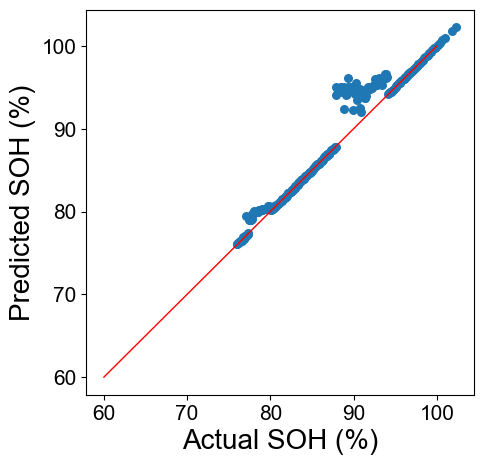

In [739]:
# get predictions
y_pred = model.predict(X_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred,s=30)
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_all_z.pdf", format='pdf', dpi=600, bbox_inches='tight')
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_all_z.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [740]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# mse = mean_squared_error(y, y_pred)
mse_all = mean_squared_error(y_test, y_pred)
print("均方误差 (MSE):", mse_all)

rmse_all = np.sqrt(mse_all)
print("均方根误差 (RMSE):", rmse_all)

# r2 = r2_score(y, y_pred)
r2_all = r2_score(y_test, y_pred)
print("决定系数 (R^2):", r2_all)

均方误差 (MSE): 4.696655950753269
均方根误差 (RMSE): 2.1671769541856216
决定系数 (R^2): 0.9066757452828725


1) Standard SHAP values

In [751]:
%%time
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# shap_values = explainer(X[0:100])

Wall time: 159 ms


In [761]:
shap_values_train = explainer(X_train[838:1147])

In [762]:
np.shape(shap_values_train.values)

(309, 10)

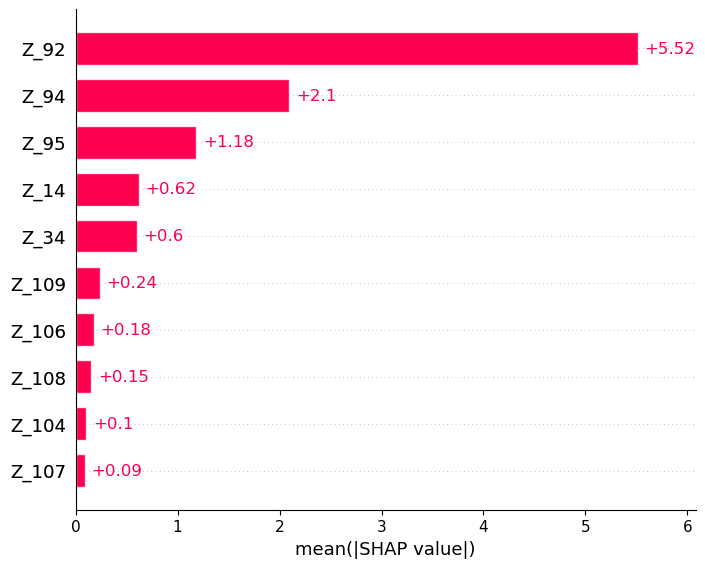

In [763]:
# mean SHAP
shap.plots.bar(shap_values, max_display=11,show=False)
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.pdf", format='pdf', dpi=600, bbox_inches='tight')

#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

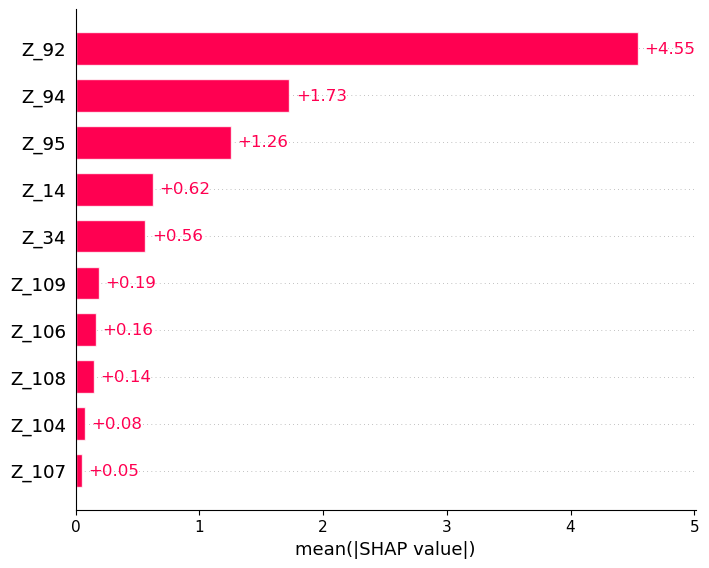

In [756]:
# mean SHAP
shap.plots.bar(shap_values_train, max_display=11,show=False)
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.pdf", format='pdf', dpi=600, bbox_inches='tight')

#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [757]:
# stacked force plot
shap.plots.force(shap_values[0:300])

In [ ]:
# mean SHAP
shap.plots.bar(shap_values, max_display=11,show=False)
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.pdf", format='pdf', dpi=600, bbox_inches='tight')

#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [745]:
np.shape(shap_values.values)

(309, 10)

In [746]:
type(shap_values.values)

numpy.ndarray

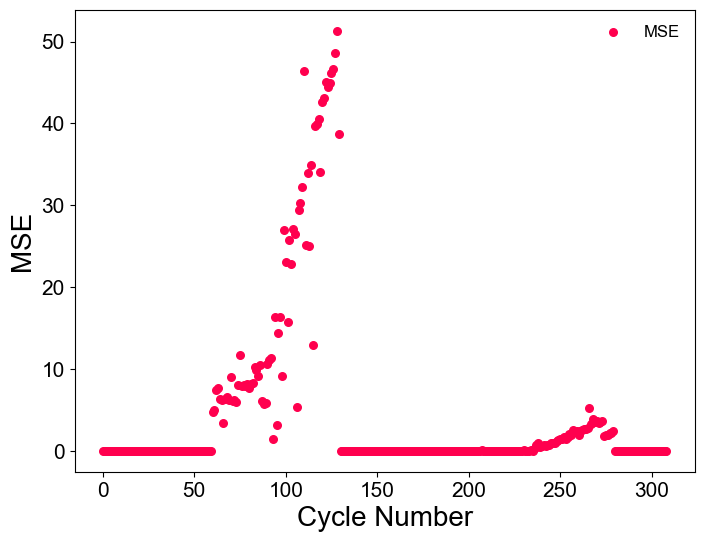

In [747]:
mse_series = np.square(np.subtract(y_test, y_pred))
plt.figure(figsize=(8, 6))
x = list(range(len(y_test)))
font = FontProperties(family='Arial', size=12)
s_point=30
plt.scatter(x, mse_series, color=redse, label='MSE', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.legend(prop=font, facecolor='white', frameon=False)
# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('MSE', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
plt.show()

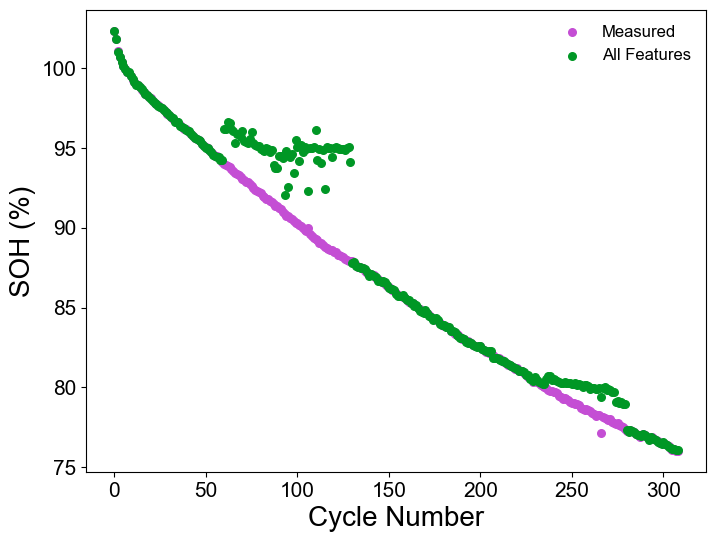

In [748]:

font = FontProperties(family='Arial', size=12)
plt.figure(figsize=(8, 6))

x = list(range(len(y_test)))

# 绘制图形

s_point=30
plt.scatter(x, y_test, color=purplese, label='Measured', s=s_point)
plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
# plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
# plt.scatter(x, y_pred_select_bot, color=redse, label='Bottom10 Features', s=s_point)

# plt.scatter(x, y_pred_some, color='orange', label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
# # 添加图例

plt.legend(prop=font, facecolor='white', frameon=False)



# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SOH (%)', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
# 添加刻度线
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.pdf", format='pdf', dpi=600, bbox_inches='tight')
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

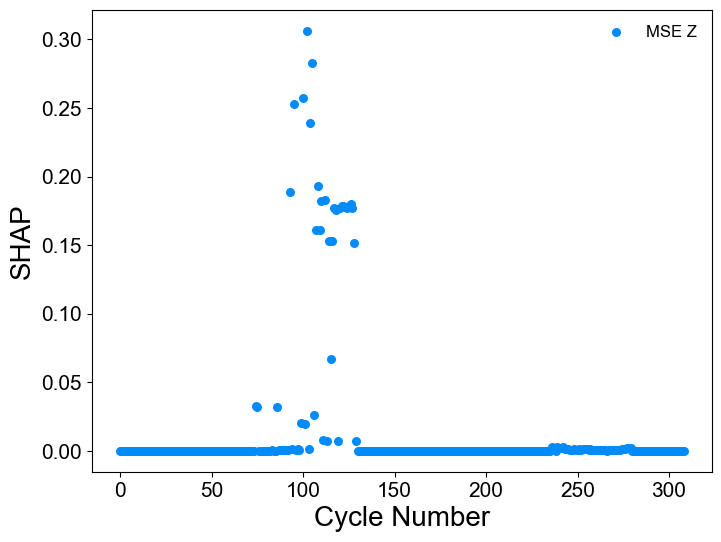

In [786]:
import matplotlib.pyplot as plt

N=7
# 假设您想可视化的是第 N 列
column_index = N - 1  # 在 Python 中索引从 0 开始，所以第 N 列的索引是 N-1
# 选取第 N 列
column_data = shap_values.values[:, column_index]
column_data_train = shap_values_train.values[:, column_index]
mse_series_z = np.square(np.subtract(column_data, column_data_train))
font = FontProperties(family='Arial', size=12)
plt.figure(figsize=(8, 6))
x = list(range(len(y_test)))
s_point=30
plt.scatter(x, mse_series_z, color=bluese, label='MSE Z', s=s_point)
# plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
# plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
# plt.scatter(x, y_pred_select_bot, color=redse, label='Bottom10 Features', s=s_point)

# plt.scatter(x, y_pred_some, color='orange', label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.legend(prop=font, facecolor='white', frameon=False)

plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SHAP', fontdict={'size': 20, 'family': 'Arial'})
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.pdf", format='pdf', dpi=600, bbox_inches='tight')
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

In [708]:
type(column_data)

numpy.ndarray

In [ ]:
# [107,95,94,108,92,109,104,34,106,14]

In [53]:
# 计算绝对值并按列求和
abs_shap_values = np.abs(shap_values.values) #取绝对值
mean = abs_shap_values.sum(axis=0) #求和

# 获取前k个最大值
k = 10
meantop = mean.argsort()[-k:][::-1]
meanbottom = mean.argsort()[:k]
#shap值
num_samples = shap_values.values.shape[0]
normalized_mean = mean / num_samples

# mean 中的前k个最大值
top_k_values = normalized_mean[meantop]
top_k_values

array([5.238706  , 2.820816  , 1.7237936 , 1.4943696 , 0.80041856,
       0.6644822 , 0.19254212, 0.1760712 , 0.16874798, 0.15155317],
      dtype=float32)

In [54]:
np.shape(shap_values.values)

(80, 120)

In [55]:
print(meantop)
print(meanbottom)

[107  95  94 108  92 109 104  34 106  14]
[44 12 45  8 38 52 43 88 10 40]


In [66]:
X_top10_test = X_test.iloc[:, meantop]
# print(X_top10_test)
X_top10 = X_train.iloc[:, meantop]
# print(X_top10)
# train model
model_select = xgb.XGBRegressor(objective="reg:squarederror")
# model.fit(X, y)
model_select.fit(X_top10, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## 模型预测

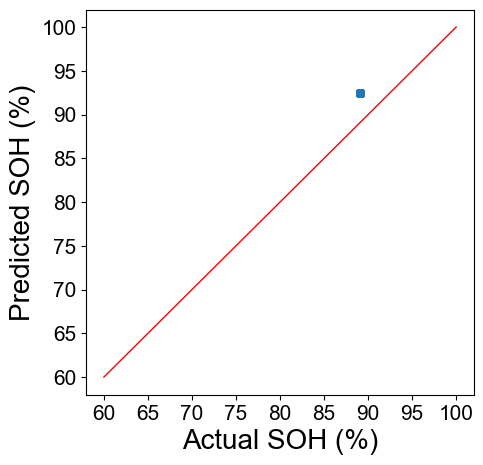

In [67]:
# get predictions
# y_pred = model.predict(X)
y_pred_select = model_select.predict(X_top10_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_select,s=30)
plt.plot([60 ,100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_top10.pdf", format='pdf', dpi=600, bbox_inches='tight')
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_top10.jpg", format='jpg', dpi=600, bbox_inches='tight')
plt.show()
plt.close()

计算结果

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# mse = mean_squared_error(y, y_pred)
mse_preferred = mean_squared_error(y_test, y_pred_select)
rmse_preferred = np.sqrt(mse_preferred)
r2_preferred = r2_score(y_test, y_pred_select)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)

均方误差 (MSE): 2.2742521986085964
均方根误差 (RMSE): 1.5080623987781794
决定系数 (R^2): 0.0
top10Z 均方误差 (MSE): 11.582784135615345
top10Z 均方根误差 (RMSE): 3.403348958836773
top10Z 决定系数 (R^2): 0.0


In [69]:
%%time
# get shap values
explainer_select = shap.Explainer(model_select)
shap_select_values = explainer_select(X_test)

# shap_values = explainer(X[0:100])

ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/slundberg/shap/issues/580.

In [ ]:
# mean SHAP
shap.plots.bar(shap_select_values, max_display=11,show=False)
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.pdf", format='pdf', dpi=600, bbox_inches='tight')

#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# stacked force plot
shap.plots.force(shap_values[0:80])

bottom_10个Z的训练

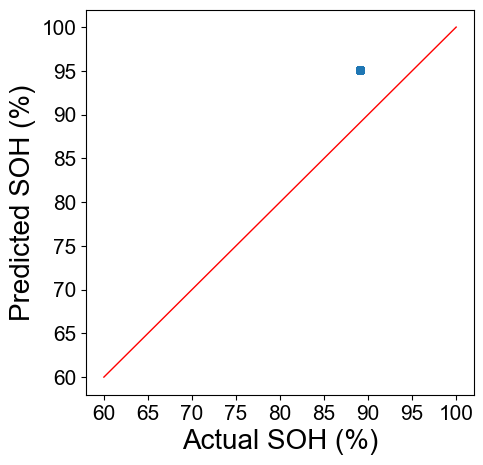

In [60]:
X_bot10_test = X_test.iloc[:, meanbottom]
# print(X_top10_test)
X_bot10_train = X_train.iloc[:, meanbottom]
# print(X_top10)
# train model
model_select_bot = xgb.XGBRegressor(objective="reg:squarederror")
# model.fit(X, y)
model_select_bot.fit(X_bot10_train, y_train)

# get predictions
# y_pred = model.predict(X)
y_pred_select_bot = model_select_bot.predict(X_bot10_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_select_bot,s=30)
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_bot10.pdf", format='pdf', dpi=600, bbox_inches='tight')
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_bot10.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [61]:
# mse = mean_squared_error(y, y_pred)
mse_preferred_bot = mean_squared_error(y_test, y_pred_select_bot)
rmse_preferred_bot = np.sqrt(mse_preferred_bot)
r2_preferred_bot = r2_score(y_test, y_pred_select_bot)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("     ")
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)
print("     ")
print("bot10Z 均方误差 (MSE):", mse_preferred_bot)
print("bot10Z 均方根误差 (RMSE):", rmse_preferred_bot)
print("bot10Z 决定系数 (R^2):", r2_preferred_bot)


均方误差 (MSE): 2.2742521986085964
均方根误差 (RMSE): 1.5080623987781794
决定系数 (R^2): 0.0
     
top10Z 均方误差 (MSE): 11.582784135615345
top10Z 均方根误差 (RMSE): 3.403348958836773
top10Z 决定系数 (R^2): 0.0
     
bot10Z 均方误差 (MSE): 35.9576011202297
bot10Z 均方根误差 (RMSE): 5.996465719090679
bot10Z 决定系数 (R^2): 0.0


## 任选特征训练；最优特征

In [1440]:
some1=meantop

In [1441]:
some2=meanbottom

In [ ]:
[107  95  94 108  92 109 104  34 106  14]

In [98]:
some3 = [107,95,94,108,92,109,104,34,106,14]

SyntaxError: invalid syntax (3894648181.py, line 1)

In [1443]:
some = some3

In [1444]:
some

[107, 92, 94, 108, 119, 106, 95, 61, 93, 91]

In [1445]:
X_some_train=X_train.iloc[:, some]
X_some_test=X_test.iloc[:, some]

In [1446]:
np.shape(X_some_test)

(294, 10)

In [1447]:
# train model
model_some = xgb.XGBRegressor(objective="reg:squarederror")
# model.fit(X, y)
model_some.fit(X_some_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

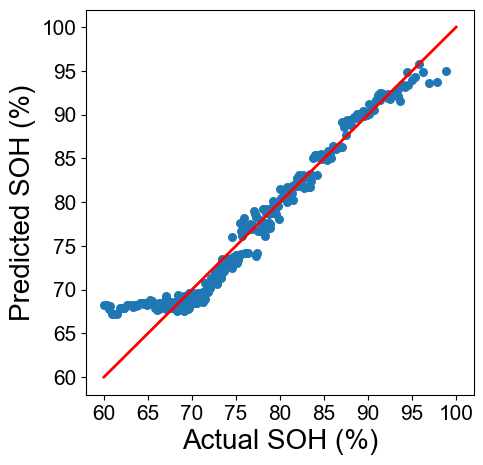

In [1448]:
font = FontProperties(family='Arial', size=12)


# get predictions
# y_pred = model.predict(X)
y_pred_some = model_some.predict(X_some_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred_some,s=30)


plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=2)
plt.show()
plt.close()

In [1449]:
# mse = mean_squared_error(y, y_pred)
mse_some = mean_squared_error(y_test, y_pred_some)
rmse_some = np.sqrt(mse_some)
r2_some = r2_score(y_test, y_pred_some)

print("均方误差 (MSE):", mse_all)
print("均方根误差 (RMSE):", rmse_all)
print("决定系数 (R^2):", r2_all)
print("     ")
print("top10Z 均方根误差 (RMSE):", rmse_preferred)
print("top10Z 均方误差 (MSE):", mse_preferred)
print("top10Z 决定系数 (R^2):", r2_preferred)
print("     ")
print("bot10Z 均方根误差 (RMSE):", rmse_preferred_bot)
print("bot10Z 均方误差 (MSE):", mse_preferred_bot)
print("bot10Z 决定系数 (R^2):", r2_preferred_bot)
print("     ")
print("some 均方根误差 (RMSE):", rmse_some)
print("some 均方误差 (MSE):", mse_some)
print("some 决定系数 (R^2):", r2_some)
print("     ")
print(meantop)
print(meanbottom)

均方误差 (MSE): 15.908540323579668
均方根误差 (RMSE): 3.9885511559436804
决定系数 (R^2): 0.8107338676050864
     
top10Z 均方根误差 (RMSE): 4.13735308090774
top10Z 均方误差 (MSE): 17.117690516096772
top10Z 决定系数 (R^2): 0.7963484384099845
     
bot10Z 均方根误差 (RMSE): 7.415504906307302
bot10Z 均方误差 (MSE): 54.98971301546767
bot10Z 决定系数 (R^2): 0.34577968234348233
     
some 均方根误差 (RMSE): 2.0451152441808023
some 均方误差 (MSE): 4.182496361980702
some 决定系数 (R^2): 0.9502402549770976
     
[ 94 119 107  93 108   0 109   7  91  12]
[48 44 46 43 96  5 42 47 81 38]


In [1450]:
k

10

## 新图 SOH预测对比，真值、all f、top10 f、bot10 f、somef

In [1451]:
y_test

1083    98.829836
1084    97.785343
1085    96.939604
1086    96.183352
1087    95.759632
          ...    
1372    60.872725
1373    60.708794
1374    60.586431
1375    60.382047
1376    60.006289
Name: SOH, Length: 294, dtype: float64

y_test
y_pred
y_pred_select
y_pred_select_bot
y_pred_some
Measured
All Features
Top10 Features
Bottom10 Features
Final10 Features

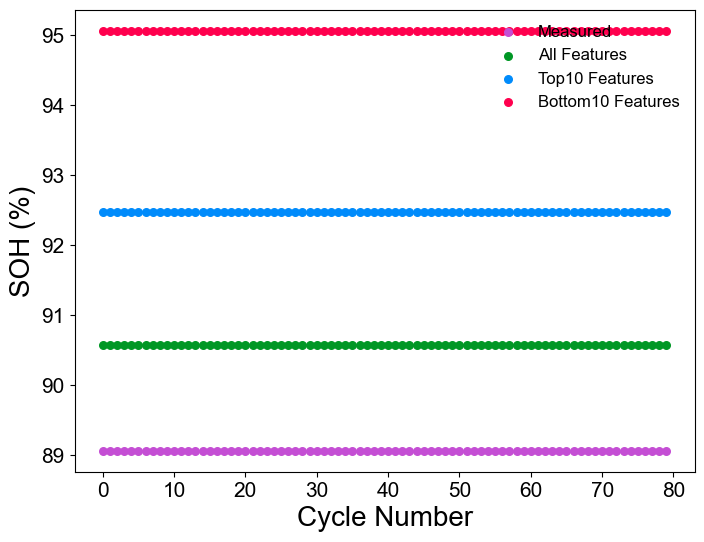

In [62]:

font = FontProperties(family='Arial', size=12)
plt.figure(figsize=(8, 6))

x = list(range(len(y_test)))

# 绘制图形

s_point=30
plt.scatter(x, y_test, color=purplese, label='Measured', s=s_point)
plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
plt.scatter(x, y_pred_select_bot, color=redse, label='Bottom10 Features', s=s_point)

# plt.scatter(x, y_pred_some, color='orange', label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
# # 添加图例

plt.legend(prop=font, facecolor='white', frameon=False)



# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SOH (%)', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
# 添加刻度线
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.pdf", format='pdf', dpi=600, bbox_inches='tight')
#plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图全.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

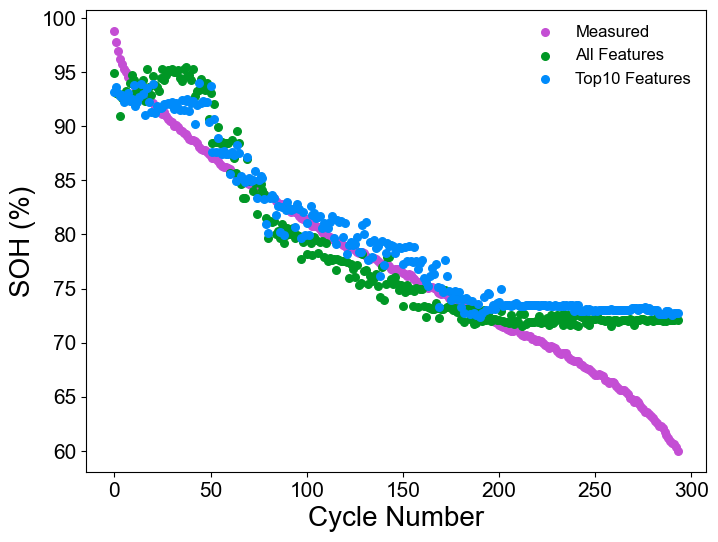

In [1453]:
font = FontProperties(family='Arial', size=12)
plt.figure(figsize=(8, 6))

x = list(range(len(y_test)))

# 绘制图形

s_point=30
plt.scatter(x, y_test, color=purplese, label='Measured', s=s_point)
plt.scatter(x, y_pred, color=greense, label='All Features', s=s_point)
plt.scatter(x, y_pred_select, color=bluese, label='Top10 Features', s=s_point)
# plt.scatter(x, y_pred_select_bot, color=redse, label='Bottom10 Features', s=s_point)

# plt.scatter(x, y_pred_some, color='orange', label='Final10 Features', s=s_point)
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
# # 添加图例

plt.legend(prop=font, facecolor='white', frameon=False)



# 添加坐标轴名称
plt.xlabel('Cycle Number', fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel('SOH (%)', fontdict={'size': 20, 'family': 'Arial'})
# 显示图表
# 添加刻度线
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图无底部.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_SOH走势对比图无底部.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

## 随机选择k个点，作为输入特征的性能。

In [1454]:
import random
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

# 初始化一个空列表来存储所有的 r2_score
r2_scores = []
same_variables = []
mse_sames = []

# 设置循环次数 w
w = 200
# 设置特征数量
random_number = k

# 特征总数
total_features = X_train.shape[1]

for _ in range(w):
    # 随机选择五个特征的索引
    random_features = random.sample(range(total_features), random_number)

    # 转化成字符串并用逗号分隔
    five = ",".join(map(str, random_features))

    # 复制到 some 变量
    same = five

    # 存储 some 变量
    same_variables.append(same)
    
    # 从 X_train 和 X_test 中提取对应的特征
    X_same_train = X_train.iloc[:, random_features]
    X_same_test = X_test.iloc[:, random_features]

    # 初始化 XGBoost 模型
    model_same = xgb.XGBRegressor(objective="reg:squarederror")

    # 训练模型
    model_same.fit(X_same_train, y_train)

    # 预测
    y_pred_same = model_same.predict(X_same_test)

    # 计算 R-squared 分数
    r2_same_random = r2_score(y_test, y_pred_same)

    # 存储 R-squared 分数
    r2_scores.append(r2_same_random)
    
    # mse = mean_squared_error(y, y_pred)
    mse_same = mean_squared_error(y_test, y_pred_same)
    mse_sames.append(mse_same)
    
# 输出所有 R-squared 分数
np.shape(r2_scores)


(200,)

In [1455]:
# 计算R-squared的平均值
average_r2 = sum(r2_scores) / len(r2_scores)

std_deviation = np.std(r2_scores)
print("Random_numbers:",random_number,".","Average R-squared:", average_r2,f"R-squared标准差: {std_deviation}")

Random_numbers: 10 . Average R-squared: 0.5813300645414601 R-squared标准差: 0.24357572963082097


In [1456]:
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)

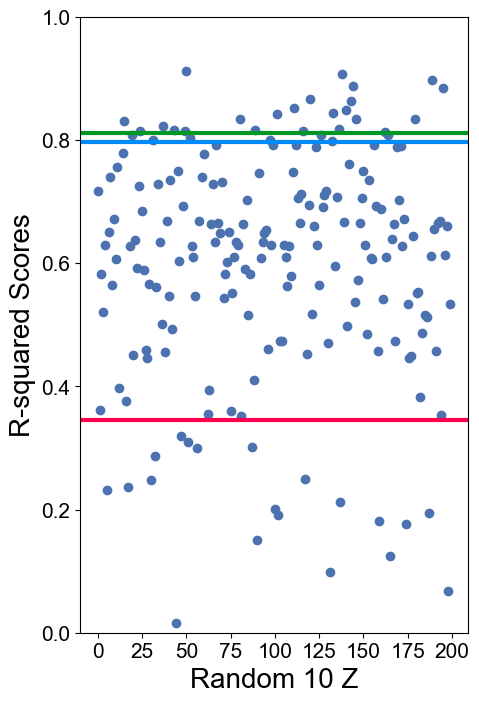

In [1460]:
import matplotlib.patches as mpatches
font = FontProperties(family='Arial', size=12)

# plt.figure(figsize=(5, 8), facecolor='white')

plt.figure(figsize=(5, 8))

# # 使用序号作为横坐标，r2_scores 作为纵坐标
plt.scatter(range(len(same_variables)), r2_scores,color=bluegreyse)

# 添加标签

plt.xlabel("Random 10 Z", fontdict={'size': 20, 'family': 'Arial'})
plt.ylabel("R-squared Scores", fontdict={'size': 20, 'family': 'Arial'})
plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15


y_allfe = r2_all ##全部特征，绿色
plt.axhline(y=y_allfe, color=greense, linewidth=3)

y_topfe=r2_preferred#顶部十个特征，蓝色
plt.axhline(y=y_topfe, color=bluese, linewidth=3)

y_bottomfe= r2_preferred_bot #底部十个特征，红色
plt.axhline(y=y_bottomfe, color=redse, linewidth=3)

# y_some= r2_some #最优十个特征，棕色
# plt.axhline(y=y_some, color=purplese, linewidth=3)

plt.ylim(0, 1.0)
# plt.savefig( f"{select_battery}_{MLmodel}_性能图.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig(f"{select_battery}_{MLmodel}_性能图.eps", format='eps', dpi=600, bbox_inches='tight')
# 创建自定义图例
legend_elements = [
    mpatches.Patch(color=greense, label='All Z'),
    mpatches.Patch(color=bluese, label='Top10 Z'),
    mpatches.Patch(color=redse, label='Bottom10 Z'),
    mpatches.Patch(color=bluegreyse, label='Random10 Z')
]

# 添加自定义图例到图表
# plt.legend(handles=legend_elements,prop=font, facecolor='white', frameon=False,loc=(0.60,0.05))
plt.grid(False)
# 显示图表

plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_random.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_random.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()

In [1461]:
# 输出所有的 R-squared 分数和 some 变量
for i in range(w):
    print(f"Iteration {i+1}: R-squared = {r2_scores[i]},mse= {mse_sames[i]} ,same = {same_variables[i]}")

Iteration 1: R-squared = 0.7174601485294173,mse= 23.748552174983676 ,same = 16,77,41,102,29,60,66,76,113,68
Iteration 2: R-squared = 0.36197179116510136,mse= 53.62870450933391 ,same = 53,115,89,40,9,58,42,21,16,110
Iteration 3: R-squared = 0.5822724299910653,mse= 35.111595548917535 ,same = 0,80,108,78,89,4,97,32,29,28
Iteration 4: R-squared = 0.5204035584657174,mse= 40.31191017986107 ,same = 63,41,42,94,48,105,86,12,103,46
Iteration 5: R-squared = 0.6295068465399803,mse= 31.14136267724203 ,same = 66,35,37,18,104,96,99,38,114,56
Iteration 6: R-squared = 0.231447645798195,mse= 64.59975677048324 ,same = 29,23,51,9,36,12,72,34,59,3
Iteration 7: R-squared = 0.649987168720642,mse= 29.419913482247473 ,same = 104,12,23,106,2,76,28,63,34,45
Iteration 8: R-squared = 0.7397588132386885,mse= 21.874264354967142 ,same = 70,36,2,119,105,61,79,107,75,42
Iteration 9: R-squared = 0.5640546542204327,mse= 36.642869088381644 ,same = 62,85,6,12,45,75,59,3,17,7
Iteration 10: R-squared = 0.6709882791923232,ms

normalized_mean #全部的shap值
top_k_values #前10个shap的值
meantop #前10个shap的特征

mse_all
rmse_all
r2_all

rmse_preferred
mse_preferred
r2_preferred

rmse_preferred_bot
mse_preferred_bot
r2_preferred_bot

rmse_some
mse_some
r2_some
r2_scores #随机特征的结果
select_battery = '第1节'

## 保存重要数据

In [1462]:

# 创建一个包含多个变量的字典
values_to_save = [ select_battery,MLmodel,r2_all,r2_preferred,r2_preferred_bot,r2_some,average_r2,meantop, normalized_mean, top_k_values,rmse_all,mse_all,  rmse_preferred, mse_preferred,rmse_preferred_bot,mse_preferred_bot,rmse_some,mse_some,r2_scores]
value_names = ["电池","模型","全部特征精度","顶部特征精度","底部特征精度","终选特征精度","随机特征平均精度","top10特征", "全部的shap值", "top10 shap值","rmse_all","mse_all","rmse_top", "mse_top", "rmse_bot","mse_bot","rmse_some终选","mse_some终选","r2_scores随机特征"]

file_name = f"被测电池_{select_battery}_模型{MLmodel}_全部数据.txt"
# 打开文件以写入数据
with open(file_name, "w") as file:
    for name, value in zip(value_names, values_to_save):
        file.write(f"{name}: {value}\n")


In [ ]:
#END